# Homework #1
## In this homework you are going to get familiar with basics of NetworkX and Gephi for analysing and visualizing networks.

## Task 1
### NetworkX is a Python library for the analysis of networks. With NetworkX you can create, import, manipulate graphs. Additionally, you can calculate some basic properties of these graphs with its built-in functions. Unfortunately, NetworkX is not very powerful for visualizing large graphs which we are going to work with most of the time. For this reason, we are going to use a software called Gephi. In this homework, you are going to do some basic analysis on some famous graphs and then store the results in a format readable by Gephi. You then use Gephi to have a meaningful visualization of these results.  

### You can download Gephi from the following web page:
### https://gephi.org/users/download

###  You can also learn the basics of NetworkX library and Gephi by looking at the following pages:
### Some useful links to get familiar with NetworkX:
### https://vimeo.com/124354692
### https://www.cl.cam.ac.uk/~cm542/teaching/2010/stna-pdfs/stna-lecture8.pdf
### Some useful links to get familiar with Gephi:
### https://gephi.org/users/tutorial-visualization/
### https://www.youtube.com/watch?v=FLiv3xnEepw

### Run the following cell to import the libraries that we are going to use in this homework:

In [0]:
%%time
#import useful packages, all of them are important but not necessarily used in this code
#enable inline plotting in Python Notebook
#supress warnings

%pylab inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy
import warnings
warnings.filterwarnings('ignore')
import time
import os

Populating the interactive namespace from numpy and matplotlib
CPU times: user 577 ms, sys: 476 ms, total: 1.05 s
Wall time: 1.12 s


### Run the following cell to unzip and store the Facebook dateset in a .txt file which is readable by NetworkX:

In [0]:
%%time
# The following code simply converts the data file from ZIP to TXT so that NetworkX can read it

import gzip
inF = gzip.GzipFile("data/facebook/facebook_combined.txt.gz", 'rb')
s = inF.read()
inF.close()

outF = open("data/facebook/facebook_combined.txt", 'wb')
outF.write(s)
outF.close()

CPU times: user 7.52 ms, sys: 3.26 ms, total: 10.8 ms
Wall time: 17.1 ms


In [0]:
%%time
#load the network after converting into text file

file_name="data/facebook/facebook_combined.txt"

#convert the information in the text file into a graph, find no. of edges & nodes in the graph

g1=nx.read_edgelist(file_name,create_using=nx.Graph(),nodetype=int)
node, edge=g1.order(),g1.size()
print("No. of nodes are=",node)
print("No. of edges are=",edge)

No. of nodes are= 4039
No. of edges are= 88234
CPU times: user 273 ms, sys: 23.8 ms, total: 297 ms
Wall time: 317 ms


### Write a code that plots the degree distribution of the above graph. (Make sure you do not confuse degree distribution with degree sequence!)

CPU times: user 24.2 ms, sys: 4.68 ms, total: 28.9 ms
Wall time: 36.2 ms


Text(0.5, 1.0, 'Facebook Network')

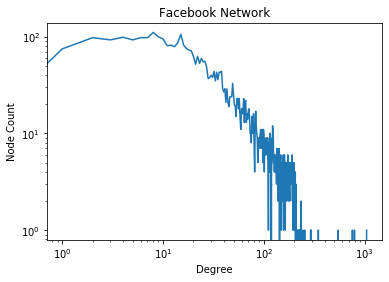

In [0]:
%%time
deg=g1.degree()
for k in g1.nodes():
    g1.node[k]['deg'] = deg(k)

temp=nx.degree_histogram(g1)
plt.loglog(temp)
plt.xlabel('Degree')
plt.ylabel('Node Count')
plt.title('Facebook Network')

### Write a code that calculates and prints the network diameter and the average shortest path.

In [0]:
# def nodes_connected(u, v):
#     return u in g1.neighbors(v)
# nodes_connected(107, 1684)

In [0]:
%%time
print("Diameter: ",nx.diameter(g1))
print("Average shortest path: ", nx.average_shortest_path_length(g1))

Diameter:  8
Average shortest path:  3.6925068496963913
CPU times: user 7min 10s, sys: 581 ms, total: 7min 11s
Wall time: 7min 16s


### Write a code to calculate the clustering coefficient of the nodes of the graph and plot it.

CPU times: user 2.81 s, sys: 6.81 ms, total: 2.81 s
Wall time: 2.88 s


Text(0.5, 1.0, 'Facebook Network')

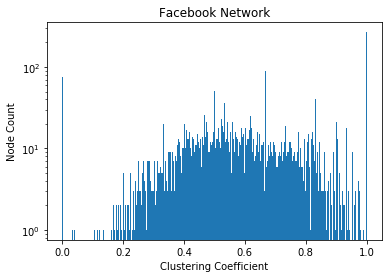

In [0]:
%%time
g1_clust=nx.clustering(g1)
#pos1=nx.spring_layout(g1)
plt.hist(g1_clust.values(),bins=500,log=True)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Node Count')
plt.title('Facebook Network')

#centrality_scatter(g1_clust,nx.degree_centrality(g1))
# plt.plot(cc_values, cc_hist)
# plt.xlabel('Clustering Coefficient')
# plt.ylabel('Number of nodes')

### Write a code to calculate the degree centrality of the nodes of the graph and plot it.

CPU times: user 310 ms, sys: 12 ms, total: 322 ms
Wall time: 343 ms


Text(0.5, 1.0, 'Facebook Network')

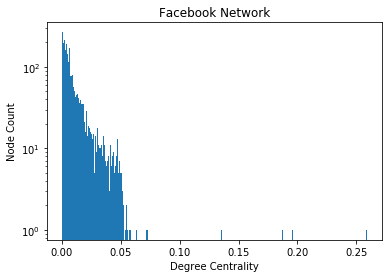

In [0]:
%%time
g1_dcen=nx.degree_centrality(g1)
for k in g1.nodes():
    g1.node[k]['dcen'] = g1_dcen[k]

plt.hist(g1_dcen.values(),bins=500,log=True)
plt.xlabel('Degree Centrality')
plt.ylabel('Node Count')
plt.title('Facebook Network')
#pos=nx.degree_centrality(g1)
# nx.draw_networkx_nodes(g1,pos1)
# nx.draw_networkx_edges(g1,pos1)
# nx.draw_networkx_labels(g1,pos1,g1_cen)
#print(nx.degree_centrality(g1))

### Write a code to calculate the betweenness centrality of the nodes of the graph and plot it.

CPU times: user 2min 44s, sys: 470 ms, total: 2min 45s
Wall time: 2min 46s


Text(0.5, 1.0, 'Facebook Network')

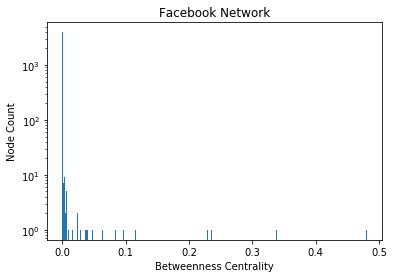

In [0]:
%%time
g1_bcen=nx.betweenness_centrality(g1)
for k in g1.nodes():
    g1.node[k]['bcen'] = g1_bcen[k]
plt.hist(g1_bcen.values(),bins=500,log=True)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Node Count')
plt.title('Facebook Network')

### Write a code to calculate the eigenvector centrality of the nodes of the graph and plot it.

CPU times: user 1.86 s, sys: 25 ms, total: 1.88 s
Wall time: 1.91 s


Text(0.5, 1.0, 'Facebook Network')

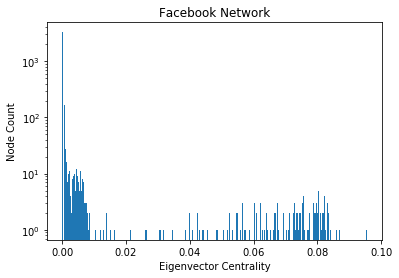

In [0]:
%%time
g1_eicen=nx.eigenvector_centrality(g1)
for k in g1.nodes():
    g1.node[k]['eicen'] = g1_dcen[k]
plt.hist(g1_eicen.values(),bins=500,log=True)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Node Count')
plt.title('Facebook Network')

### Write a code to store the graph in a file that is readable by Gephi (Hint: Use NetworkX write_gml method.) Make sure to add the betweenness centrality and degree of each node as an attribute of each node to be stored in this file for the next task.

In [0]:
%%time

nx.write_gml(g1,"data/fb_g1.gml")
# results = [(k,g1_clust[k],g1_cen[k],g1_bcen[k],g1_eicen[k]) for k in g1]
# f = open('facebook.txt','w')
# for item in results:
#     f.write(','.join(map(str,item)))
#     f.write('\n')
# f.close()

CPU times: user 392 ms, sys: 18 ms, total: 410 ms
Wall time: 436 ms


### Repeat the above parts for the other three networks.

## Enron email network analysis

In [0]:
%%time
inF = gzip.GzipFile("data/enron/email-Enron.txt.gz", 'rb')
s = inF.read()
inF.close()

outF = open("data/enron/email-Enron.txt", 'wb')
outF.write(s)
outF.close()

CPU times: user 47.1 ms, sys: 8 ms, total: 55.1 ms
Wall time: 66.1 ms


In [0]:
%%time
#load the network after converting into text file

file_name="data/enron/email-Enron.txt"

#convert the information in the text file into a graph, find no. of edges & nodes in the graph

g2=nx.read_edgelist(file_name,create_using=nx.Graph(),nodetype=int)
node, edge=g2.order(),g2.size()
print("No. of nodes are=",node)
print("No. of edges are=",edge)

No. of nodes are= 36692
No. of edges are= 183831
CPU times: user 1.59 s, sys: 79 ms, total: 1.67 s
Wall time: 1.69 s


CPU times: user 118 ms, sys: 3 ms, total: 121 ms
Wall time: 133 ms


Text(0.5, 1.0, 'Enron Email Network')

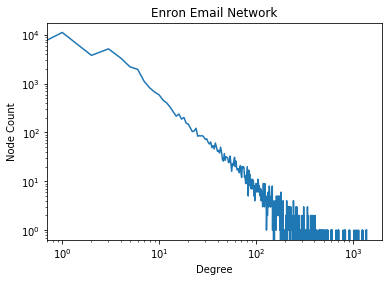

In [0]:
%%time
deg=g2.degree()
for k in g2.nodes():
    g2.node[k]['deg'] = deg[k]
temp2=nx.degree_histogram(g2)
plt.loglog(temp2)
plt.xlabel('Degree')
plt.ylabel('Node Count')
plt.title('Enron Email Network')

In [0]:
%%time
#print(nx.number_connected_components(g2))
temp=list(nx.connected_component_subgraphs(g2,copy=True))
#print(nx.average_shortest_path_length(temp[0]))
max_dia=0
index=0
for i in range(len(temp)):
    t=nx.diameter(temp[i])
    if(t>max_dia):
        index=i
        max_dia=t
print("Only print information on the longest diameter graph:")
print("%s Diameter: " %(index) ,max_dia)
print("%s Average shortest path: " %(index), nx.average_shortest_path_length(temp[index]))

Only print information on the longest diameter graph:
0 Diameter:  13
0 Average shortest path:  4.025163988178407
CPU times: user 3h 52min 11s, sys: 1min 48s, total: 3h 53min 59s
Wall time: 3h 57min 46s


CPU times: user 5.68 s, sys: 12 ms, total: 5.69 s
Wall time: 5.94 s


Text(0.5, 1.0, 'Enron Email Network')

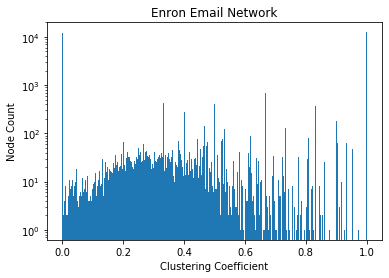

In [0]:
%%time
g2_clust=nx.clustering(g2)
plt.hist(g2_clust.values(),bins=500,log=True)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Node Count')
plt.title('Enron Email Network')

CPU times: user 278 ms, sys: 8 ms, total: 286 ms
Wall time: 302 ms


Text(0.5, 1.0, 'Enron Email Network')

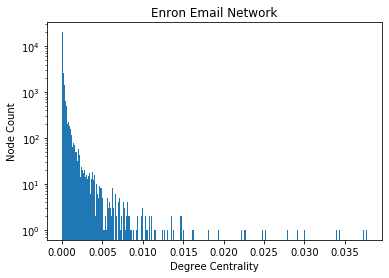

In [0]:
%%time
g2_dcen=nx.degree_centrality(g2)
for k in g2.nodes():
    g2.node[k]['dcen'] = g2_dcen[k]
plt.hist(g2_dcen.values(),bins=500,log=True)
plt.xlabel('Degree Centrality')
plt.ylabel('Node Count')
plt.title('Enron Email Network')
#print(nx.degree_centrality(g1))

CPU times: user 3h 29min 13s, sys: 9.41 s, total: 3h 29min 23s
Wall time: 3h 31min 42s


Text(0.5, 1.0, 'Enron Email Network')

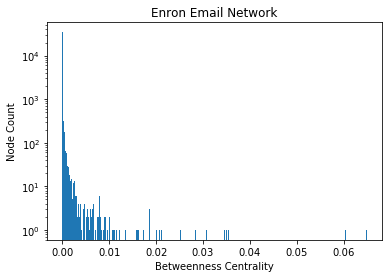

In [0]:
%%time
g2_bcen=nx.betweenness_centrality(g2)
for k in g2.nodes():
    g2.node[k]['bcen'] = g2_bcen[k]
plt.hist(g2_bcen.values(),bins=500,log=True)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Node Count')
plt.title('Enron Email Network')

CPU times: user 2.22 s, sys: 7.99 ms, total: 2.23 s
Wall time: 2.31 s


Text(0.5, 1.0, 'Enron Email Network')

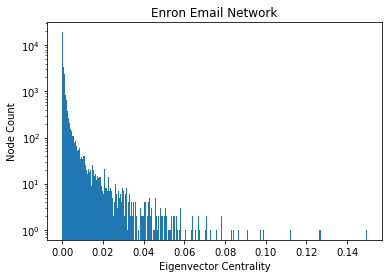

In [0]:
%%time
g2_eicen=nx.eigenvector_centrality(g2)
for k in g2.nodes():
    g2.node[k]['eicen'] = g2_eicen[k]
plt.hist(g2_eicen.values(),bins=500,log=True)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Node Count')
plt.title('Enron Email Network')

In [0]:
%%time
nx.write_gml(g2,"data/Enron_g2.gml")

CPU times: user 1.02 s, sys: 17 ms, total: 1.04 s
Wall time: 1.08 s


## 'citNet'- Citation network analysis

In [0]:
%%time
#load the network after converting into text file

file_name="data/citNet/citations.txt"

#convert the information in the text file into a graph, find no. of edges & nodes in the graph

g3=nx.read_edgelist(file_name,create_using=nx.Graph(),nodetype=int)
node, edge=g3.order(),g3.size()
print("No. of nodes are=",node)
print("No. of edges are=",edge)

No. of nodes are= 27770
No. of edges are= 352324
CPU times: user 1.16 s, sys: 100 ms, total: 1.26 s
Wall time: 1.27 s


CPU times: user 140 ms, sys: 13 ms, total: 153 ms
Wall time: 166 ms


Text(0.5, 1.0, 'Citation Network')

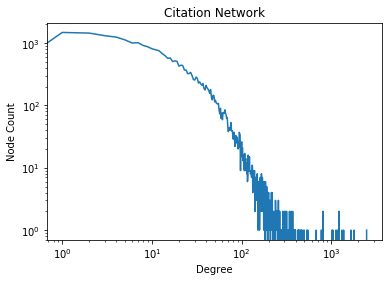

In [0]:
%%time
deg=g3.degree()
for k in g3.nodes():
    g3.node[k]['deg'] = deg[k]
temp=nx.degree_histogram(g3)
plt.loglog(temp)
plt.xlabel('Degree')
plt.ylabel('Node Count')
plt.title('Citation Network')

In [0]:
%%time
#print("Diameter: ",nx.diameter(g3))
#print("Average shortest path: ", nx.average_shortest_path_length(g3))
g3sub=list(nx.connected_component_subgraphs(g3,copy=True))
max_dia=0
index=0
for i in range(len(g3sub)):
    t=nx.diameter(g3sub[i])
    if(t>max_dia):
        index=i
        max_dia=t
print("Only print information on the longest diameter graph:")
print("%s Diameter: " %(index) ,max_dia)
print("%s Average shortest path: " %(index), nx.average_shortest_path_length(g3sub[index]))

Only print information on the longest diameter graph:
0 Diameter:  15
0 Average shortest path:  4.278680083960654
CPU times: user 4h 59min 12s, sys: 15.9 s, total: 4h 59min 28s
Wall time: 5h 2min 44s


CPU times: user 9.18 s, sys: 31 ms, total: 9.21 s
Wall time: 9.31 s


Text(0.5, 1.0, 'Citation Network')

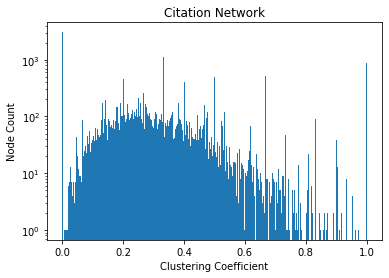

In [0]:
%%time
g3_clust=nx.clustering(g3)
plt.hist(g3_clust.values(),bins=500,log=True)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Node Count')
plt.title('Citation Network')

CPU times: user 409 ms, sys: 7 ms, total: 416 ms
Wall time: 437 ms


Text(0.5, 1.0, 'Citation Network')

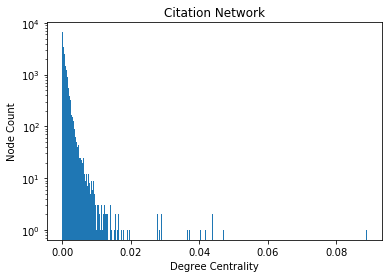

In [0]:
%%time
g3_dcen=nx.degree_centrality(g3)
for k in g3.nodes():
    g3.node[k]['dcen'] = g3_dcen[k]
plt.hist(g3_dcen.values(),bins=500,log=True)
plt.xlabel('Degree Centrality')
plt.ylabel('Node Count')
plt.title('Citation Network')

CPU times: user 3h 22min 49s, sys: 8.37 s, total: 3h 22min 57s
Wall time: 3h 25min 47s


Text(0.5, 1.0, 'Citation Network')

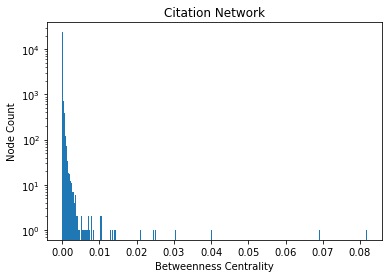

In [0]:
%%time
g3_bcen=nx.betweenness_centrality(g3)
for k in g3.nodes():
    g3.node[k]['bcen'] = g3_bcen[k]
plt.hist(g3_bcen.values(),bins=500,log=True)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Node Count')
plt.title('Citation Network')

CPU times: user 7.11 s, sys: 22 ms, total: 7.14 s
Wall time: 7.39 s


Text(0.5, 1.0, 'Citation Network')

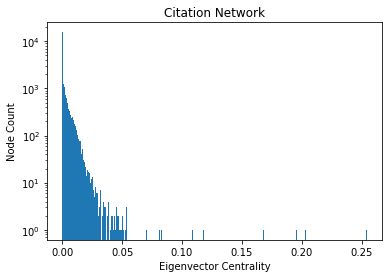

In [0]:
%%time
g3_eicen=nx.eigenvector_centrality(g3)
for k in g3.nodes():
    g3.node[k]['eicen'] = g3_eicen[k]
plt.hist(g3_eicen.values(),bins=500,log=True)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Node Count')
plt.title('Citation Network')

In [0]:
# uncompress .txt.gz to .txt
inF = gzip.GzipFile("data/citNet/cit-HepTh.txt.gz", 'rb')
s = inF.read()
inF.close()
outF = open("data/citNet/cit-HepTh.txt", 'wb')
outF.write(s)
outF.close()
# uncompress cit-HepTh-abstracts.tar.gz
import tarfile
import functools
tarfile.open("data/citNet/cit-HepTh-abstracts.tar.gz").extractall("data/citNet/cit-HepTh-abstracts")
 
# extract the author name
def get_authors(l):
    authors = functools.reduce(list.__add__, [a.split(",") for a in l[9:].split("and")])
    return [x.strip() for x in authors]
 
 
# attach the attribute author
# here G is your networkX graph
thred = sorted(g3_dcen.values(), reverse=True)[100]
for subdir, dirs, files in os.walk("data/cit-HepTh-abstracts"):
    for fl in files:
        filepath = subdir + os.sep + fl
        if filepath.endswith(".abs"):
            node_num = int(fl[:-4])
            name = ""
            for l in open(filepath):
                if l.startswith("Authors:"):
                    name = get_authors(l)[0]
                if node_num in g3sub[index].nodes():
                    if g3.node[node_num]['dcen'] > thred:
                        g3.node[node_num]['author'] = name
                    elif 'author' in g3.node[node_num]:
                        del g3.node[node_num]['author']


In [0]:
%%time
nx.write_gml(g3,"data/Cit_g3.gml")

CPU times: user 1.94 s, sys: 25 ms, total: 1.97 s
Wall time: 2.01 s


## Erdos Network- Collaboration Network analysis

In [0]:
%%time
#load the network after converting into text file

file_name="data/erdos/Erdos1.html"

g4 = nx.Graph()

#convert the information in the text file into a graph, find no. of edges & nodes in the graph
dict_authors = {'Paul Erdos':0}
g4.add_node(0)
g4.node[0]['author'] = 'Paul Erdos'

line_count = 1
skip_line = 24
skip_space = 1

is_new = False
author = ""
coauthor = ""
index = 1
ind_author = 1
ind_coauthor = 1

def parseLine(l, start):
    end = start
    while end < len(l) - 1 and not (l[end] == ' ' and l[end + 1] == ' '):
        end += 1
    return l[start:end]

def addAuthor(auth, ind):
    if auth in dict_authors:
        return ind
    dict_authors[auth] = ind
    return ind + 1

for l in open(file_name):    
    if line_count >= skip_line:
        if l == '\n':
            is_new = True
        elif is_new:
            author = parseLine(l, 0)
            index = addAuthor(author, index)
            ind_author = dict_authors[author]
            g4.add_edge(0, ind_author)
            g4.node[ind_author]['author'] = author
            is_new = False
        elif l == '</pre>':
            break
        else:
            coauthor = parseLine(l, skip_space)
            index = addAuthor(coauthor, index)
            ind_coauthor = dict_authors[coauthor]
            g4.add_edge(ind_author, ind_coauthor)
            g4.node[ind_coauthor]['author'] = coauthor
    line_count += 1

node, edge=g4.order(),g4.size()
print("No. of nodes are=",node)
print("No. of edges are=",edge)

No. of nodes are= 11524
No. of edges are= 18504
CPU times: user 184 ms, sys: 11 ms, total: 195 ms
Wall time: 194 ms


CPU times: user 58.9 ms, sys: 3 ms, total: 61.9 ms
Wall time: 58.9 ms


Text(0.5, 1.0, 'Erdos Network')

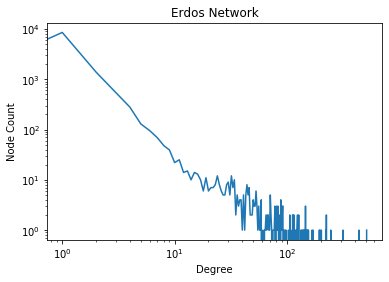

In [0]:
%%time
deg=g4.degree()
for k in g4.nodes():
    g4.node[k]['deg'] = deg(k)
temp=nx.degree_histogram(g4)
plt.loglog(temp)
plt.xlabel('Degree')
plt.ylabel('Node Count')
plt.title('Erdos Network')

In [0]:
%%time
print("Diameter: ",nx.diameter(g4))
print("Average shortest path: ", nx.average_shortest_path_length(g4))

Diameter:  4
Average shortest path:  3.821987433309889
CPU times: user 11min 40s, sys: 250 ms, total: 11min 40s
Wall time: 11min 49s


CPU times: user 882 ms, sys: 13 ms, total: 895 ms
Wall time: 915 ms


Text(0.5, 1.0, 'Erdos Network')

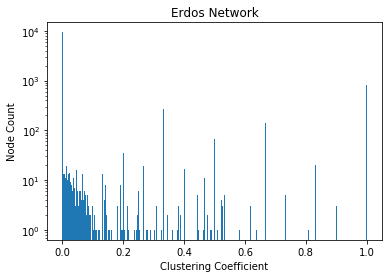

In [0]:
%%time
g4_clust=nx.clustering(g4)
plt.hist(g4_clust.values(),bins=500,log=True)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Node Count')
plt.title('Erdos Network')

CPU times: user 333 ms, sys: 9 ms, total: 342 ms
Wall time: 353 ms


Text(0.5, 1.0, 'Erdos Network')

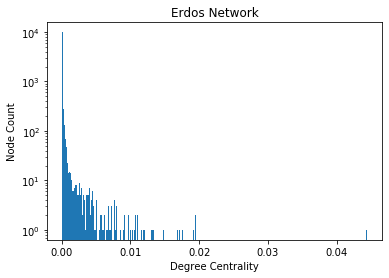

In [0]:
%%time
g4_dcen=nx.degree_centrality(g4)
for k in g4.nodes():
    g4.node[k]['dcen'] = g4_dcen[k]
plt.hist(g4_dcen.values(),bins=500,log=True)
plt.xlabel('Degree Centrality')
plt.ylabel('Node Count')
plt.title('Erdos Network')

CPU times: user 15min 18s, sys: 2.11 s, total: 15min 20s
Wall time: 15min 33s


Text(0.5, 1.0, 'Erdos Network')

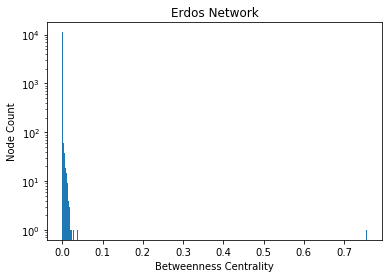

In [0]:
%%time
g4_bcen=nx.betweenness_centrality(g4)
for k in g4.nodes():
    g4.node[k]['bcen'] = g4_bcen[k]
plt.hist(g4_bcen.values(),bins=500,log=True)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Node Count')
plt.title('Erdos Network')

CPU times: user 572 ms, sys: 6 ms, total: 578 ms
Wall time: 597 ms


Text(0.5, 1.0, 'Erdos Network')

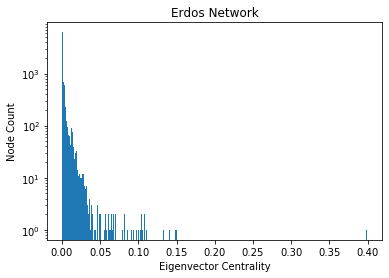

In [0]:
%%time
g4_eicen=nx.eigenvector_centrality(g4)
for k in g4.nodes():
    g4.node[k]['eicen'] = g4_eicen[k]
plt.hist(g4_eicen.values(),bins=500,log=True)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Node Count')
plt.title('Erdos Network')

In [0]:
%%time
nx.write_gml(g4,"data/Erdos_g4.gml")

CPU times: user 411 ms, sys: 3 ms, total: 414 ms
Wall time: 441 ms


## Task 2
### In this task we will use Gephi to visualize the networks that you analyzed. In the previous task, you saved the graph in the graphml format such that each node has its degree and its betweenness centrality as its attribute. In this task, you are going to use these attributes to have a better visualization of the graph. Follow these steps to obtain a nice and meaningful visualization of the graphs:

### Open Gephi-->> Open the '.gml' file of a network -->> Change 'Layout' of the graph to Force Atlas 2, etc. to have a better visualisation -->> In the 'Appearance' window there are multiple options to change the appearance of the nodes/ edges of the graph according to various network properties like degree, clustering coefficient, modularity class, etc.-->> Set the node sizes according to Degree distribution. -->> Save the image file and include it in the following cell for each of the above networks.

### Respond to the following questions for the Facebook and Enron-email datasets.
#### 1) Visualize the network in Gephi by using a suitable layout, with the node size as well as the node label / Id proportional to the degree distribution of each node. Use 3 different colors to differentiate nodes with high, moderate and low degree distributions.
#### 2) Repeat (1) with the node size as well as the node label / Id size proportional to the betweenness centrality.
#### 3) Analyze all the graphs and explain which of the nodes according to you are the most important ones, as far as the network structure is concerned. Why?

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd gdrive/My\ Drive/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive


Facebook Network


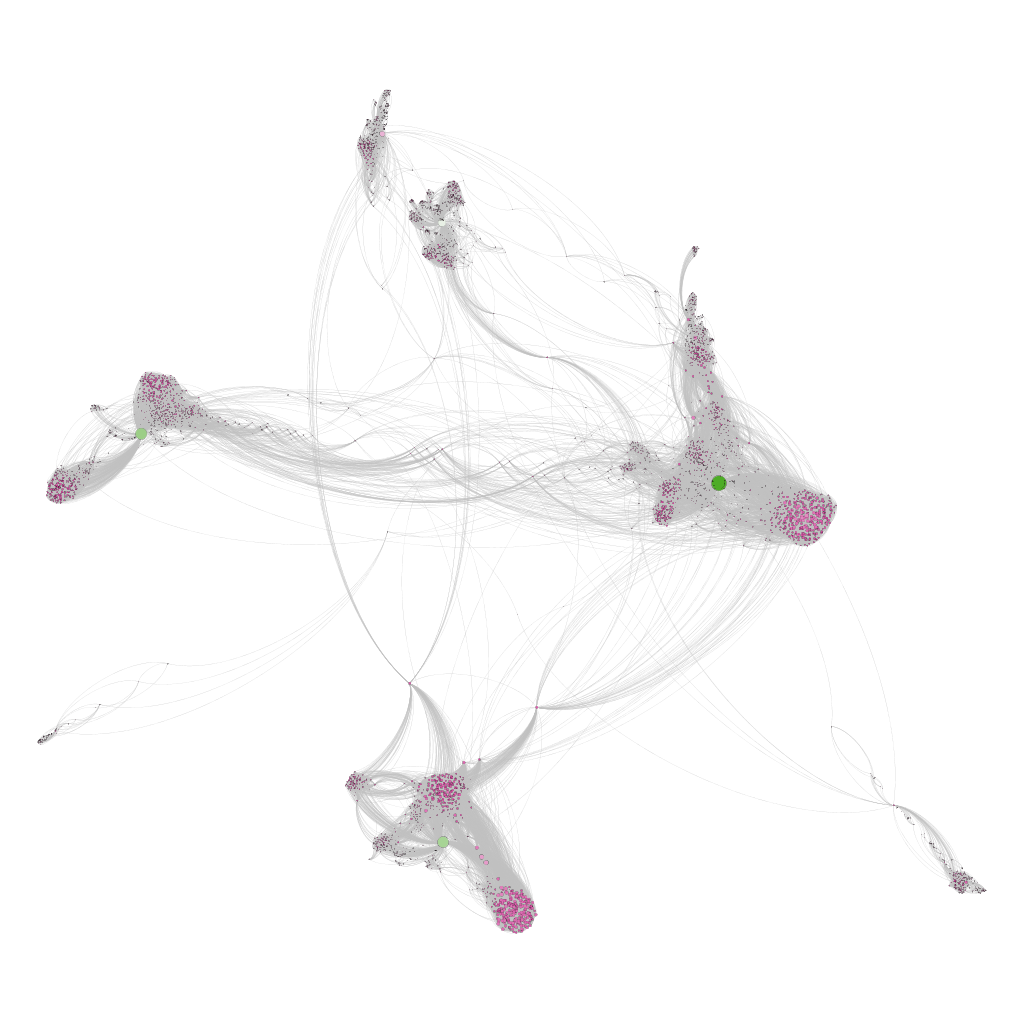

In [3]:
from IPython.display import Image
#![title](img/fb.png)
print('Facebook Network')
Image(filename="fb.png")

Enron Email Network


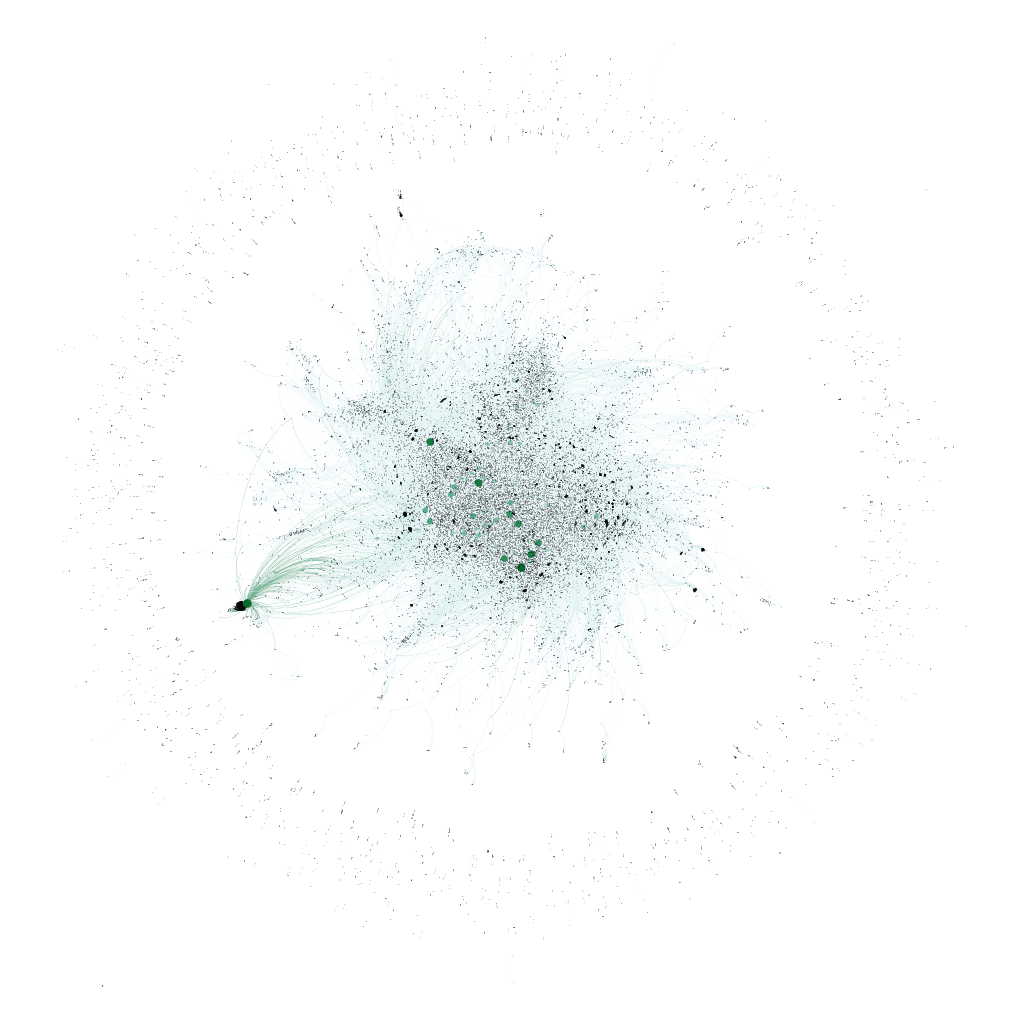

In [0]:
print('Enron Email Network')
Image(filename="Enron.png")

Citation Network


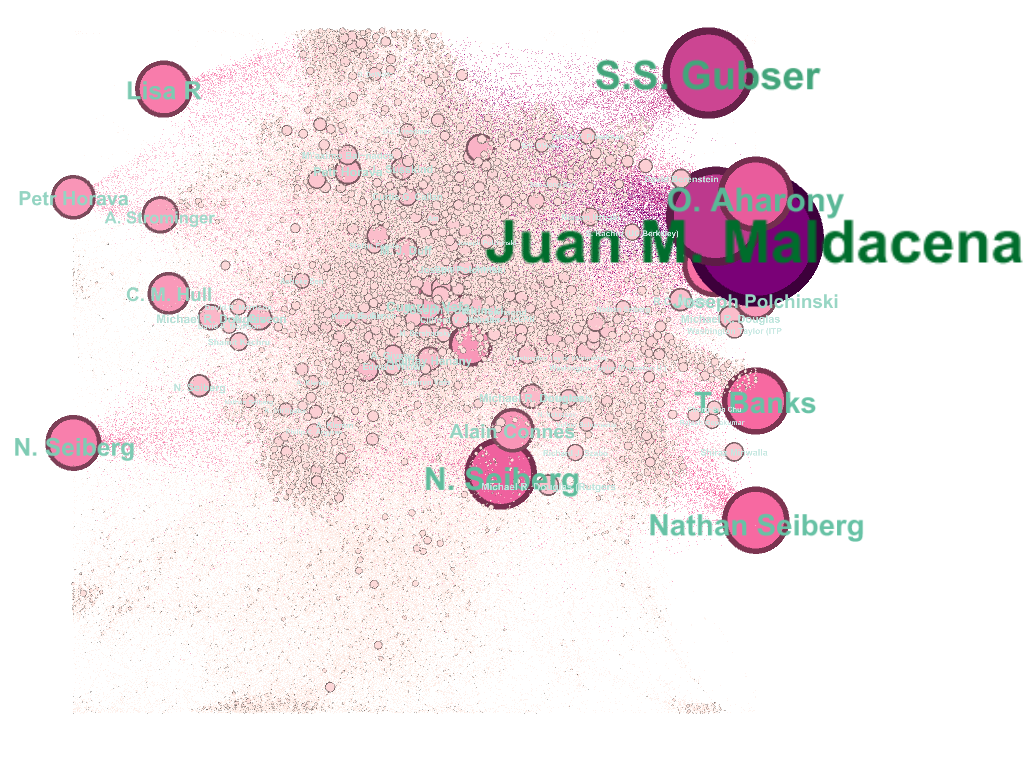

In [0]:
print('Citation Network')
Image(filename="Cit.png")

Erdos Network


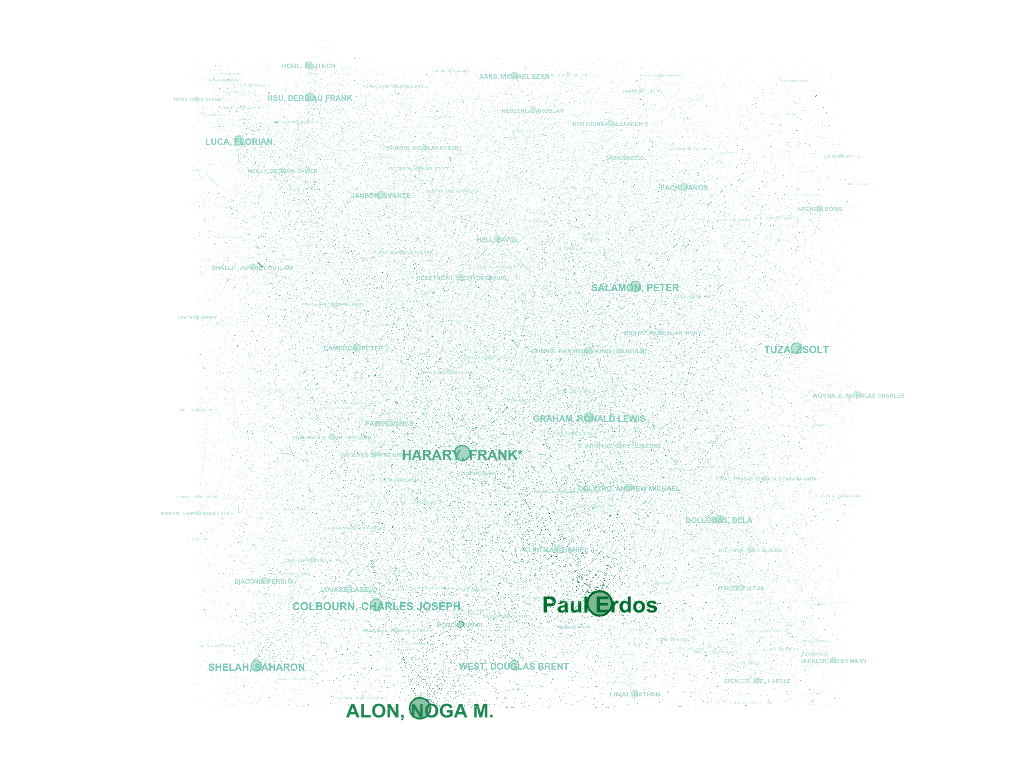

In [0]:
print('Erdos Network')
Image(filename="Erdos.png")

We know that betweenness centrality measures how important a node is when considering shortest paths in the network. A higher betweenness centrality of a node tends to show that information frequently passes through this node when two other nodes need to communicate with each other. On the other hand, A lower betweenness centrality of a node tends to show that information rarely passes through this node. For Facebook network, I believe nodes having higher betweenness centrality is more important than other centrality measurements. In social media, the more people you can refer to, the more popular you are. So, if a person can act as a bridge between communication from any two people, than that person is important and has higher betweenness centrality. I believe top 3 most important nodes are Label 107, 1684 and 1912.From this visualization of Facebook network, there are roughly 6 distinct clusters nodes tend to gather to. From these 6 clusters, Label 107, 1684 and 1912 each locate in a cluster and Label 107 and 1684 have a connection to each other. In addition, these top 3 nodes have the most degree within their clusters shows that they have the most influential role when two distinct nodes within from any these three clusters need to communicate to each other. Notice that even though Label 3437 have a similar betweenness centrality to Label 1912, Label 1912 has a degree of 755 and Label 3437 has degree of 547. Lastly, Label 1912 has more nodes in corresponding cluster than that of Label 3437. Therefore, we believe that Label 1912 is more important than Label 3437.

For Enron Network, we see that most of the nodes have a connection to other nodes and thus formed a huge cluster in the network. In this email network, degree distribution is more important than betweenness centrality; Any two people do not neccessarily need to know each other in order to communicate because they only need to know their email address so that they can send messages. Therefore, the more email address one knows, the more important one is in the network. The highest betweenness centrality of the node is only 0.06485 on Label 5038, which also has the highest degree with 1383 in the network. However, even though Label 5038 has the highest betweenness centrality, it has comparative low eigenvector centrality to Label 273. The eigenvector centrality of Label 5038 and 273 are 0.00389 and 0.11206, respectively. These two nodes also have similar degree and degree centrality, but Label 273 only has betweenness centrality 0.0349. We know that eigenvector centrality measures the importance of a node if it is linked by other important nodes. Therefore, I consider these two nodes are both equivalently important in this network.

Facebook Network (Betweenness)


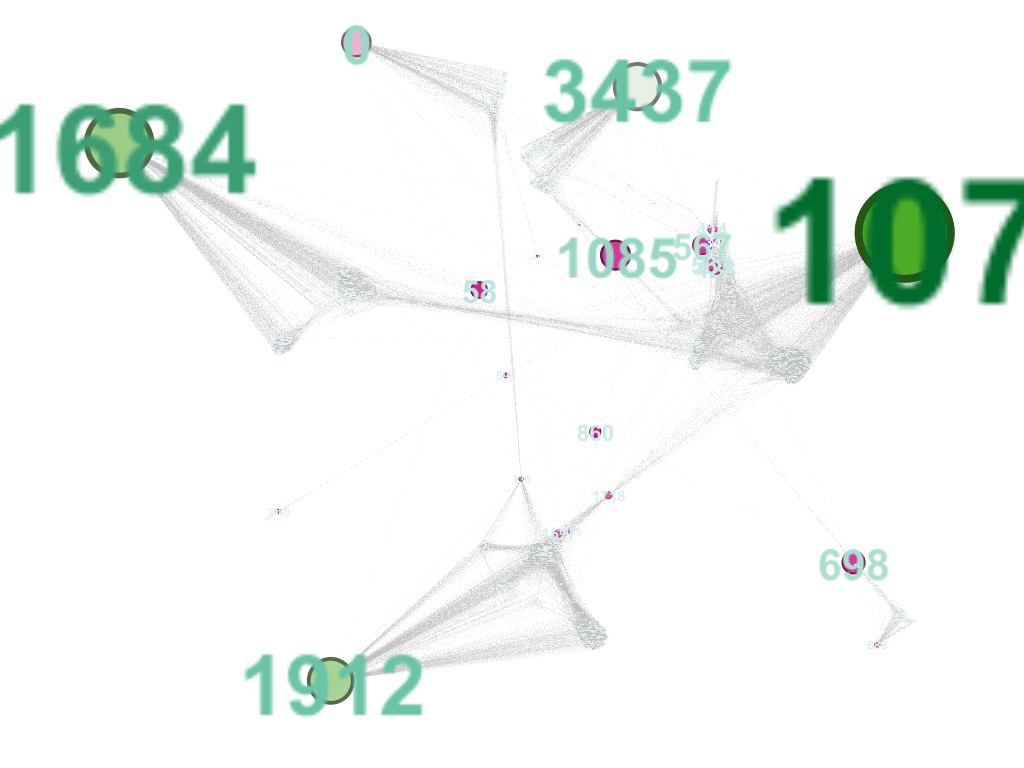

In [0]:
print('Facebook Network (Betweenness)')
Image(filename="fb2.png")


Enron Network (Betweenness)


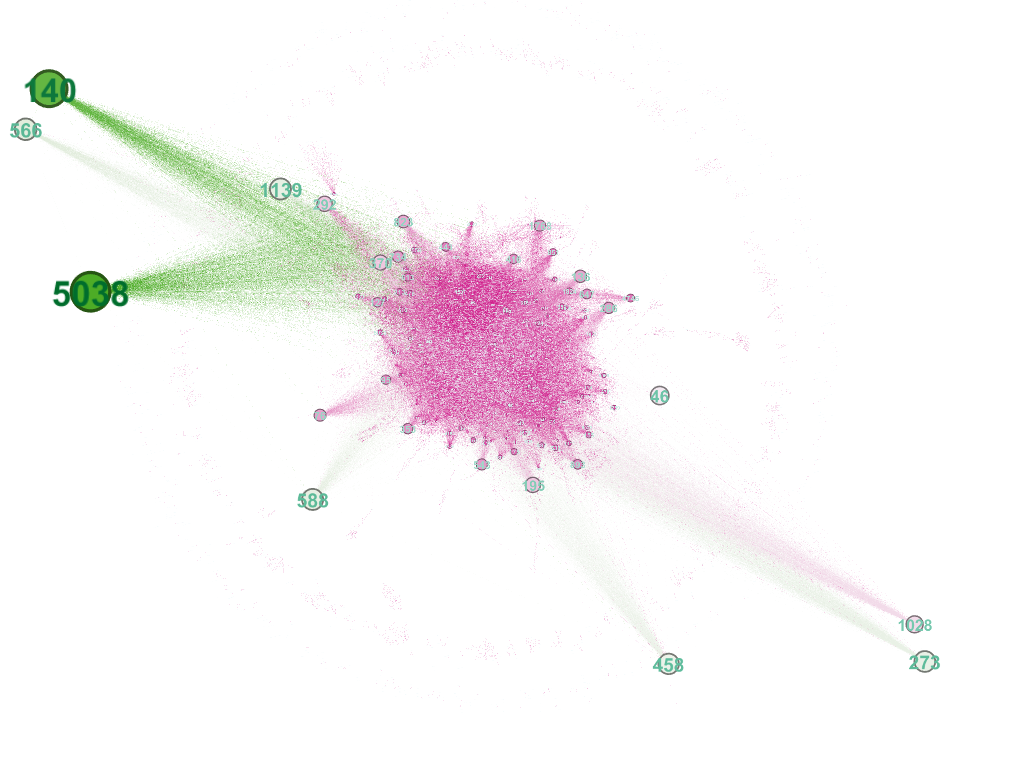

In [4]:
print('Enron Network (Betweenness)')
Image(filename="Enron2.png")